In [31]:
import numpy as np
import pandas as pd
from scipy import stats as st
from sklearn.linear_model import LinearRegression
import scipy

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sb

import math

plt.style.use('ggplot')  # стиль графиков

%matplotlib inline

In [32]:
xls = pd.ExcelFile(r'./../table.xls')
df = xls.parse(3)
df

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,64,Female,Former,21.48380,Often,1298.8,57.0,6.3,0.0,170.3,1945,890,200,915
1,76,Female,Never,23.87631,Often,1032.5,50.1,15.8,0.0,75.8,2653,451,124,727
2,38,Female,Former,20.01080,Not often,2372.3,83.6,19.1,14.1,257.9,6321,660,328,721
3,40,Female,Former,25.14062,No,2449.5,97.5,26.5,0.5,332.6,1061,864,153,615
4,72,Female,Never,20.98504,Often,1952.1,82.6,16.2,0.0,170.8,2863,1209,92,799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,46,Female,Former,25.89669,No,2263.6,98.2,19.4,2.6,306.5,2572,1261,164,216
311,45,Female,Never,23.82703,Often,1841.1,84.2,14.1,2.2,257.7,1665,465,80,328
312,49,Female,Never,24.26126,Often,1125.6,44.8,11.9,4.0,150.5,6943,520,300,502
313,31,Female,Former,23.45255,Often,2729.6,144.4,13.2,2.2,381.8,741,644,121,684


# 9.1.2

In [33]:
X = df.C11.to_numpy()
Y = df.C13.to_numpy()

In [34]:
X

array([1945, 2653, 6321, 1061, 2863, 1729, 5371,  823, 2895, 3307, 1714,
       2031, 1982, 2120, 1388, 3888, 2194, 3470, 2108, 1157, 1739, 1008,
        606, 1380, 4916, 4451, 5983, 2413, 3087,  521, 2431, 3141, 1668,
       4366,  494, 7026, 1529,  241,  998, 6082, 2741, 2100, 2359,  603,
       1625, 2888, 1099, 2103, 2260,  452, 3549, 2204, 4964, 1052, 3572,
       2902, 1788, 5111, 1378, 1431, 1727, 2893, 2524, 2533,  982, 1535,
        326, 1487, 1114, 1080, 2492, 1349, 6948, 1086, 2629, 1307, 1306,
       3465, 1846, 1334, 4848, 1734, 1120, 1498,  330, 5909, 3326, 2110,
       2719, 2309, 1153, 1432, 2493, 3054, 1861, 4268, 1652, 1802, 2308,
       1210,  214, 1370, 2354, 2446, 3473, 3359, 1062, 1489, 3982, 1656,
        768, 1496,  683,  885, 1662, 1552, 2144, 3567, 1423, 1293, 2111,
       2874, 1699,  954, 1368, 3318, 2247,  910, 1171, 2077, 1210, 1826,
       2628,  561, 1893, 1312, 1913,  924,  728, 4387, 1976, 2422, 1407,
       1301, 1112, 1052, 1008, 1054, 1484,  657,  6

In [35]:
Y

array([ 200,  124,  328,  153,   92,  148,  258,   64,  218,   81,  184,
         91,  120,   61,  108,  211,  235,  288,  102,  113,   74,  129,
        140,  138,  143,  416,  212,  786,   35,  122,  119,  182,  186,
        216,  751,   39,  107,   74,  418, 1415,  400,  102,  135,   97,
        124,  195,  107,   53,  148,   77,  316,   77,  266,   39,  225,
        173,   79,  102,  158,  159,  157,   96,  160,  100,  293,  171,
         89,  109,  129,   87,  328,  298,  379,  204,   75,  127,  131,
         21,  233,   73,   25,  137,   82,  327,  142,   86,  150,   53,
        112,  104,  170,  150,  282,   91,  125,  282,   16,  129,  180,
         39,   54,   78,   34,   95,  174,   95,   97,  204,   25,  270,
        285,  110,  162,  179,  131,   86,  225,  249,  254,  189,  108,
        121,  238,  127,  141,  427,  305,   74,  156,  168,  116,  290,
        304,  198,  253,  148,  492,  156,   27,   52,  210,   83,  182,
         40,   69,  172,  253,  435,  429,  326,   

In [36]:
r, _ = st.pearsonr(X, Y)
r

0.22477951363303011

In [37]:
beta_1 = r * np.std(Y) / np.std(X)
beta_0 = np.mean(Y) - beta_1 * np.mean(X)
beta_0, beta_1

(128.89386881962395, 0.027909089527889522)

In [38]:
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y)
model.score(X.reshape((-1, 1)), Y)

0.05052582974910158

In [39]:
model.intercept_, model.coef_

(128.89386881962395, array([0.02790909]))

In [40]:
def f(x):
    return beta_1 * x + beta_0

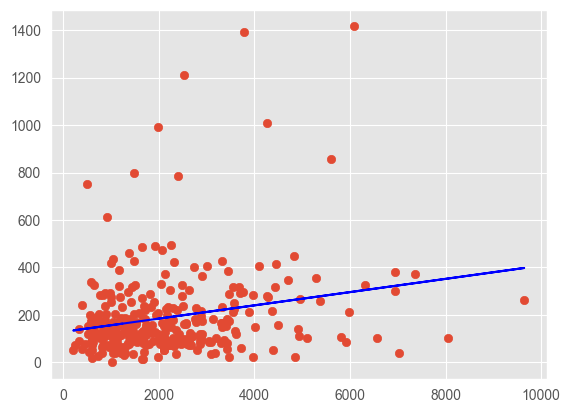

In [41]:
plt.scatter(X, Y)
lin_reg = f(X)
plt.plot(X, lin_reg, color='blue')

In [58]:
n = len(Y)
k = 2

In [59]:
D_resY = np.sum((Y - f(X)) ** 2) / n

# D_resY = np.mean((Y - f(X)) ** 2)
D_resY

31696.276121225408

In [60]:
D_resY1 = n * D_resY / (n - k)
D_resY1

31898.808237015986

In [61]:
t = st.t(n - 2)
for alpha in [0.01, 0.05, 0.1]:
    print(f'{alpha = }')
    quantile = t.ppf(1 - (alpha / 2))

    a = beta_0 - quantile * np.sqrt(D_resY1 * (np.sum(X ** 2) / (n ** 2 * np.var(X))))
    b = beta_0 + quantile * np.sqrt(D_resY1 * (np.sum(X ** 2) / (n ** 2 * np.var(X))))
    print(f'b_0 lower: {a}')
    print(f'b_0 higher: {b}')
    print()

    a = beta_1 - quantile * np.sqrt(D_resY1 / (n * np.var(X)))
    b = beta_1 + quantile * np.sqrt(D_resY1 / (n * np.var(X)))
    print(f'b_1 lower: {a}')
    print(f'b_1 higher: {b}')
    print()

alpha = 0.01
b_0 lower: 82.19752756875722
b_0 higher: 175.59021007049068

b_1 lower: 0.010186345568016286
b_1 higher: 0.04563183348776276

alpha = 0.05
b_0 lower: 93.44185753561682
b_0 higher: 164.3458801036311

b_1 lower: 0.01445392576091381
b_1 higher: 0.04136425329486523

alpha = 0.1
b_0 lower: 99.16866747213051
b_0 higher: 158.6190701671174

b_1 lower: 0.016627431939190813
b_1 higher: 0.03919074711658823



In [76]:
quantile = t.ppf(1 - (0.1 / 2))


def f_lower(x):
    return f(x) - quantile * np.sqrt(D_resY1 * (1 / n + (x - np.mean(X))**2 / (n * np.var(X))))


def f_higher(x):
    return f(x) + quantile * np.sqrt(D_resY1 * (1 / n + (x - np.mean(X))**2 / (n * np.var(X))))

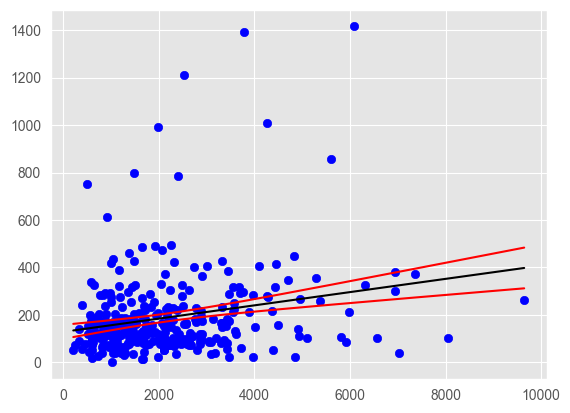

In [77]:
x1 = np.linspace(min(X), max(X), 10000)
plt.scatter(X, Y, color='blue')
plt.plot(x1, f(x1), color='black')
plt.plot(x1, f_lower(x1), color='red')
plt.plot(x1, f_higher(x1), color='red')

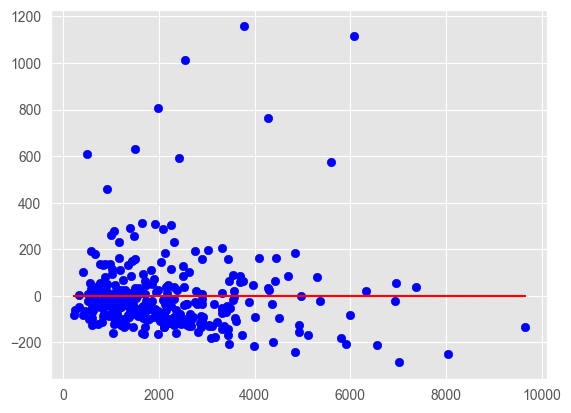

In [84]:
plt.scatter(X, Y - f(X), color='blue')
model = LinearRegression()
model.fit(X.reshape((-1, 1)), Y - f(X))
model.score(X.reshape((-1, 1)), Y)
plt.plot(X, model.predict(X.reshape((-1, 1))), color='red')

In [87]:
np.mean(Y - f(X)), np.var(Y - f(X))

(-5.052748343182935e-15, 31696.276121225408)